# Data Load and Wrangle

## The goal of the exercise is to load a dataset, clean and transform and compute descriptive statistics

In [ ]:
# This piece of code enables to display multiple output within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

<div class="alert alert-block alert-warning">
    
## Task Instructions 
### Load one of the built in dataset
### Transform the data as required 
### From a perspective of a journalist interested in writing a story about the data, **_ask and answer_** **3** questions that summarize the sample. 
    
#### Please *_only use summary statistics_* (mean, median, mode, standard deviation, variance, range,..). The statistics can be computed by groups.

#### Reference :https://kolesnikov.ga/Datasets_in_Python/

</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
grunfeld = sm.datasets.grunfeld
print(grunfeld.DESCRLONG)

Grunfeld (1950) Investment Data for 11 U.S. Firms.


In [3]:
print(grunfeld.NOTE)

::

    Number of observations - 220 (20 years for 11 firms)

    Number of variables - 5

    Variables name definitions::

        invest  - Gross investment in 1947 dollars
        value   - Market value as of Dec. 31 in 1947 dollars
        capital - Stock of plant and equipment in 1947 dollars
        firm    - General Motors, US Steel, General Electric, Chrysler,
                Atlantic Refining, IBM, Union Oil, Westinghouse, Goodyear,
                Diamond Match, American Steel
        year    - 1935 - 1954

    Note that raw_data has firm expanded to dummy variables, since it is a
    string categorical variable.



In [4]:
dataset_grunfeld = grunfeld.load_pandas()

In [5]:
df_grunfeld = dataset_grunfeld.data
df_grunfeld.tail(10)

,invest,value,capital,firm,year
210,9.577,59.152,69.144,American Steel,1945.0
211,3.956,68.424,70.269,American Steel,1946.0
212,3.834,48.505,71.051,American Steel,1947.0
213,5.970,40.507,71.508,American Steel,1948.0
214,6.433,39.961,73.827,American Steel,1949.0
215,4.770,36.494,75.847,American Steel,1950.0
216,6.532,46.082,77.367,American Steel,1951.0
217,7.329,57.616,78.631,American Steel,1952.0
218,9.020,57.441,80.215,American Steel,1953.0
219,6.281,47.165,83.788,American Steel,1954.0


In [6]:
df_grunfeld.shape

(220, 5)

In [7]:
df_grunfeld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   invest   220 non-null    float64
 1   value    220 non-null    float64
 2   capital  220 non-null    float64
 3   firm     220 non-null    object 
 4   year     220 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.7+ KB


In [8]:
df_grunfeld.describe()

,invest,value,capital,year
count,220.000000,220.000000,220.000000,220.000000
mean,133.311900,988.577805,257.108541,1944.500000
std,210.587186,1287.301172,293.227914,5.779431
min,0.930000,30.284000,0.800000,1935.000000
25%,27.380000,160.325000,67.100000,1939.750000
50%,52.365000,404.650000,180.100000,1944.500000
75%,99.782500,1605.925000,344.500000,1949.250000
max,1486.700000,6241.700000,2226.300000,1954.000000


In [9]:
df_grunfeld.isnull().sum()[df_grunfeld.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [10]:
df_grunfeld.isnull().sum()[df_grunfeld.isnull().sum()>0].sort_values(ascending=False)/df_grunfeld.shape[0]
#no missing values

Series([], dtype: float64)

In [11]:
working_data = df_grunfeld.copy()

In [12]:
working_data.drop_duplicates(inplace = True, keep = 'last')
working_data.shape

(220, 5)

In [13]:
working_data.columns

Index(['invest', 'value', 'capital', 'firm', 'year'], dtype='object')

In [14]:
working_data.columns = [col.upper() for col in working_data]
working_data.columns 

Index(['INVEST', 'VALUE', 'CAPITAL', 'FIRM', 'YEAR'], dtype='object')

In [15]:
from datetime import date

In [16]:
date_sold = pd.DataFrame({'Year': working_data['YEAR'], 'Firm' : working_data['FIRM'], 'Capital': working_data['CAPITAL']})
date_sold.shape

(220, 3)

In [17]:
date_sold.head()

,Year,Firm,Capital
0,1935.0,General Motors,2.8
1,1936.0,General Motors,52.6
2,1937.0,General Motors,156.9
3,1938.0,General Motors,209.2
4,1939.0,General Motors,203.4


In [18]:
#Which Years and Firms gave the Lowest Capital? 
date_sold.sort_values('Capital')

,Year,Firm,Capital
141,1936.0,Westinghouse,0.80
140,1935.0,Westinghouse,1.80
0,1935.0,General Motors,2.80
191,1946.0,Diamond Match,3.23
190,1945.0,Diamond Match,3.31
...,...,...,...
15,1950.0,General Motors,1099.00
16,1951.0,General Motors,1207.70
17,1952.0,General Motors,1430.50
18,1953.0,General Motors,1777.30


In [19]:
date_invest = pd.DataFrame({'Year': working_data['YEAR'], 'Firm' : working_data['FIRM'], 'Invest': working_data['INVEST']})
date_invest.head()

,Year,Firm,Invest
0,1935.0,General Motors,317.6
1,1936.0,General Motors,391.8
2,1937.0,General Motors,410.6
3,1938.0,General Motors,257.7
4,1939.0,General Motors,330.8


In [20]:
#In what firms did Grunfeld invest in per year? How much did he invest on each firm? 
date_invest.sort_values('Year')

,Year,Firm,Invest
0,1935.0,General Motors,317.600
160,1935.0,Goodyear,26.630
60,1935.0,Chrysler,40.290
20,1935.0,US Steel,209.900
180,1935.0,Diamond Match,2.540
...,...,...,...
119,1954.0,IBM,135.720
179,1954.0,Goodyear,49.340
19,1954.0,General Motors,1486.700
99,1954.0,Atlantic Refining,81.430


In [21]:
subset_data = working_data[['CAPITAL','YEAR']]
grouped_data = subset_data.groupby([ 'YEAR'])

In [22]:
#What was the average capital gained every year? 
grouped_data.mean()

,CAPITAL
YEAR,
1935.0,61.373727
1936.0,72.264818
1937.0,98.479000
1938.0,132.162000
1939.0,147.003545
1940.0,150.041182
1941.0,166.516455
1942.0,191.190091
1943.0,200.375727


<AxesSubplot:>

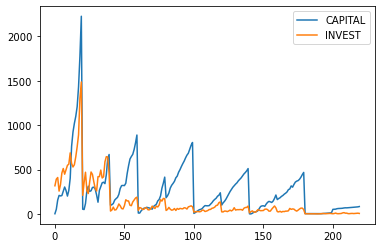

In [23]:
working_data[['CAPITAL','INVEST']].plot()

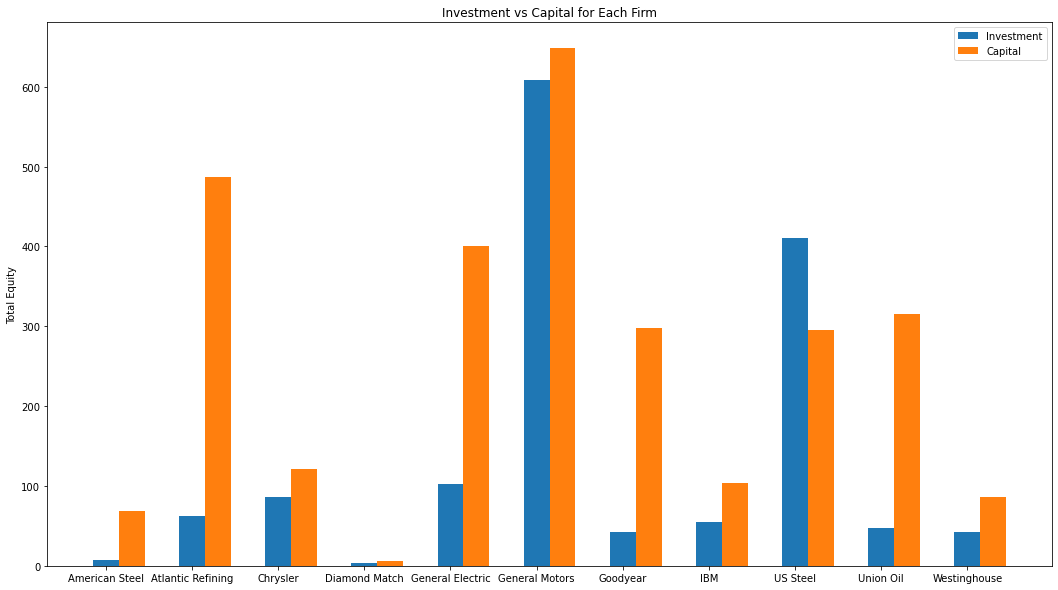

In [24]:
yax1 = working_data.groupby(['FIRM'])['INVEST'].mean()
yax2 = working_data.groupby(['FIRM'])['CAPITAL'].mean()
ind = np.arange(yax1.shape[0])
width = 0.30

f, ax = plt.subplots(figsize=(18,10))
p1 = plt.bar(ind, yax1, width) 
p2 = plt.bar(ind+ width, yax2, width)

plt.ylabel('Total Equity')
plt.title('Investment vs Capital for Each Firm')
plt.xticks(ind, yax2.index)

plt.legend((p1[0], p2[0]), ('Investment', 'Capital'))

plt.show()

array([[<AxesSubplot:xlabel='INVEST', ylabel='INVEST'>,
        <AxesSubplot:xlabel='CAPITAL', ylabel='INVEST'>,
        <AxesSubplot:xlabel='YEAR', ylabel='INVEST'>,
        <AxesSubplot:xlabel='VALUE', ylabel='INVEST'>],
       [<AxesSubplot:xlabel='INVEST', ylabel='CAPITAL'>,
        <AxesSubplot:xlabel='CAPITAL', ylabel='CAPITAL'>,
        <AxesSubplot:xlabel='YEAR', ylabel='CAPITAL'>,
        <AxesSubplot:xlabel='VALUE', ylabel='CAPITAL'>],
       [<AxesSubplot:xlabel='INVEST', ylabel='YEAR'>,
        <AxesSubplot:xlabel='CAPITAL', ylabel='YEAR'>,
        <AxesSubplot:xlabel='YEAR', ylabel='YEAR'>,
        <AxesSubplot:xlabel='VALUE', ylabel='YEAR'>],
       [<AxesSubplot:xlabel='INVEST', ylabel='VALUE'>,
        <AxesSubplot:xlabel='CAPITAL', ylabel='VALUE'>,
        <AxesSubplot:xlabel='YEAR', ylabel='VALUE'>,
        <AxesSubplot:xlabel='VALUE', ylabel='VALUE'>]], dtype=object)

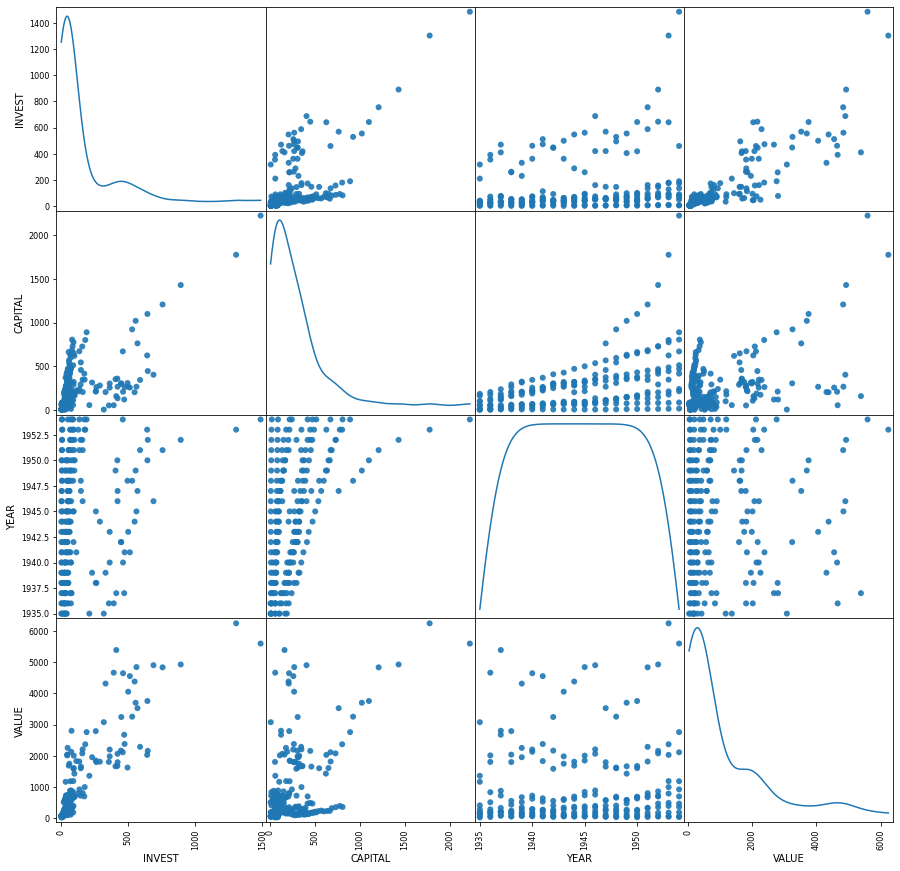

In [25]:
subsetd = working_data[['INVEST','CAPITAL','YEAR', 'VALUE']]
pd.plotting.scatter_matrix(subsetd, alpha=0.9, marker="o", figsize=(15,15),diagonal = 'kde', grid=True)

In [26]:
subsetd.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,INVEST,CAPITAL,YEAR,VALUE
INVEST,1.00,0.68,0.21,0.86
CAPITAL,0.68,1.00,0.48,0.51
YEAR,0.21,0.48,1.00,0.06
VALUE,0.86,0.51,0.06,1.00


count     220.000000
mean      133.311900
std       210.587186
min         0.930000
25%        27.380000
50%        52.365000
75%        99.782500
max      1486.700000
Name: INVEST, dtype: float64

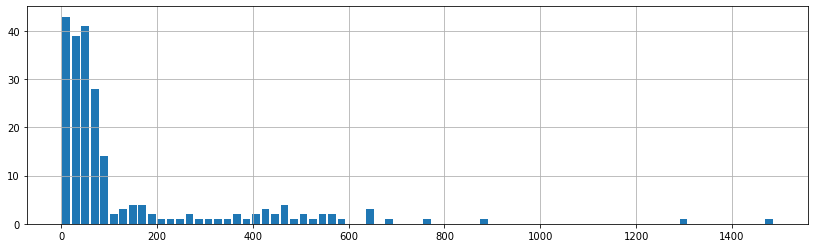

In [27]:
subsetd['INVEST'].hist(bins=75, rwidth=.8, figsize=(14,4))
subsetd['INVEST'].describe()

The minimun investment done was 0.93 cents and the maximum investment was 1486.70. The median investment was 52.36. Most of the investments seem to be done within the 0-200 dollar value whith a very few done withing the 200-1600 range. 

In [28]:
#Ho, investment is normally distributed (Gaussian), H1: Investment is not normally distributed (not Gaussian)
from scipy.stats import shapiro
series_2test = subsetd[['INVEST']]
stat, p = shapiro(series_2test)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.608, p=0.000
Probably not Gaussian


Since p value < alpha (0.05) we reject the null hypothesis. We can conclude that investment is not normally distributed. 

In [29]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

target= subsetd['INVEST']
df_train = subsetd.drop(['INVEST'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(df_train,target,test_size=0.33,random_state=0)
grunfeld_train = pd.concat([x_train, y_train], axis=1)
grunfeld = pd.concat([x_test, y_test], axis=1)

In [30]:
grunfeld_train

,CAPITAL,YEAR,VALUE,INVEST
56,671.30,1951.0,1819.40,135.20
116,177.20,1951.0,676.90,95.30
97,729.30,1952.0,359.40,85.40
19,2226.30,1954.0,5593.60,1486.70
197,9.93,1952.0,74.42,6.00
...,...,...,...,...
67,71.40,1942.0,410.90,46.80
192,3.90,1947.0,64.97,3.81
117,200.00,1952.0,702.00,99.49
47,287.80,1942.0,1588.00,91.90


In [37]:
grunfeld_ts = pd.DataFrame(grunfeld.groupby(['YEAR']).INVEST.count())
grunfeld_ts.info()
grunfeld_ts.head()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 20 entries, 1935.0 to 1954.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INVEST  20 non-null     int64
dtypes: int64(1)
memory usage: 320.0 bytes


,INVEST
YEAR,
1950.0,5
1951.0,6
1952.0,2
1953.0,4
1954.0,5


In [38]:
grunfeld_ts.tail()

,INVEST
YEAR,
1950.0,5
1951.0,6
1952.0,2
1953.0,4
1954.0,5


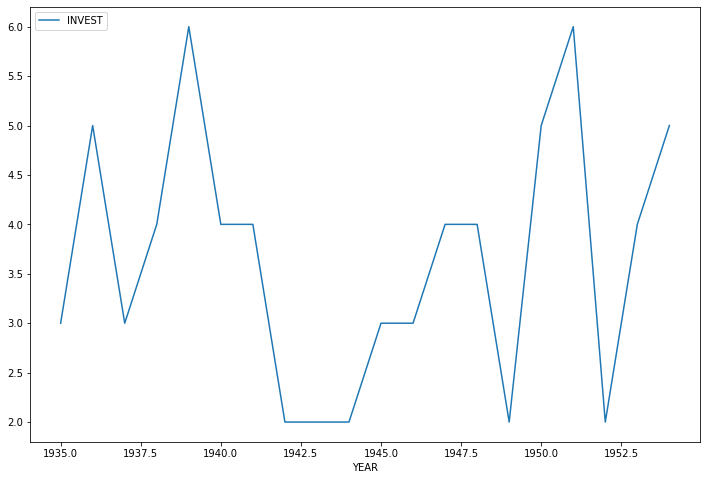

In [39]:
#How many investments were made each year?

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
grunfeld_ts.INVEST.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);

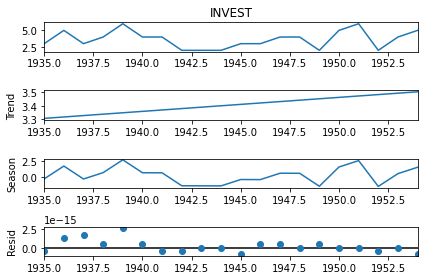

In [41]:
from statsmodels.tsa.seasonal import STL
stl = STL(pd.Series(grunfeld_ts.INVEST),period =12)
res = stl.fit()
fig = res.plot()

There seems to be an increase in investments from years 1937.5 to 1940 and 1949 and 1951. There is a constant upwards trend of investments made. 